In [1]:
import pandas as pd
from data_preparation import *
import matplotlib.pyplot as plt
#from autogluon.timeseries import TimeSeriesPredictor
import seaborn as sns
import numpy as np
from statistics import stdev, mean
from missing_timestamps import remove_duplicates, missing_data
from functions import *


/home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = Preparation(r'/home/iva/Desktop/operato-meteo-1/data/MAS_processed/ELES-MAS-5001.csv.gz', "AMBIENT_TEMPERATURE")
train, test = data.split()
train_processed = remove_duplicates(train)
missing_timestamps_train, missing_values_filled_previous_train = missing_data(train_processed)
test_processed = remove_duplicates(test)
missing_timestamps_test, missing_values_filled_previous_test = missing_data(test_processed)


In [3]:
missing_timestamps_train

[Timestamp('2020-10-13 10:55:00', freq='5T'),
 Timestamp('2020-10-17 13:30:00', freq='5T'),
 Timestamp('2020-10-19 21:00:00', freq='5T'),
 Timestamp('2020-10-20 15:45:00', freq='5T'),
 Timestamp('2020-10-20 23:20:00', freq='5T'),
 Timestamp('2020-10-20 23:25:00', freq='5T'),
 Timestamp('2020-10-21 00:00:00', freq='5T'),
 Timestamp('2020-10-21 00:05:00', freq='5T'),
 Timestamp('2020-10-21 00:20:00', freq='5T'),
 Timestamp('2020-10-21 00:25:00', freq='5T'),
 Timestamp('2020-10-21 02:10:00', freq='5T'),
 Timestamp('2020-10-21 04:05:00', freq='5T'),
 Timestamp('2020-10-21 09:05:00', freq='5T'),
 Timestamp('2020-10-21 09:10:00', freq='5T'),
 Timestamp('2020-10-21 09:15:00', freq='5T'),
 Timestamp('2020-10-22 01:55:00', freq='5T'),
 Timestamp('2020-10-22 07:00:00', freq='5T'),
 Timestamp('2020-10-22 07:05:00', freq='5T'),
 Timestamp('2020-10-23 22:20:00', freq='5T'),
 Timestamp('2020-10-28 08:55:00', freq='5T'),
 Timestamp('2020-10-28 11:05:00', freq='5T'),
 Timestamp('2020-10-29 07:50:00', 

/home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


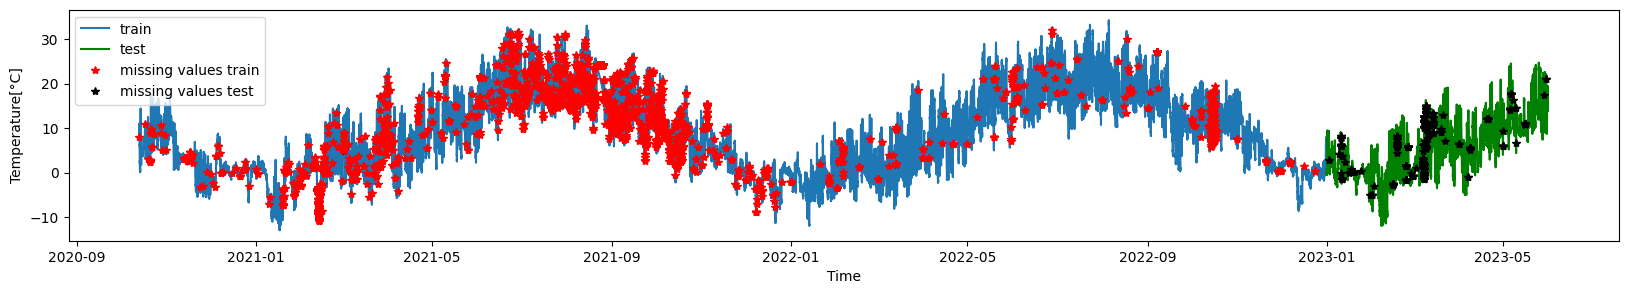

In [3]:
fig, ax = plt.subplots(figsize=(20, 3))
plt.plot(train_processed.index, train_processed.values, label='train')
plt.plot(test_processed.index, test_processed.values, 'g', label='test')
for t, v in zip(missing_timestamps_train, missing_values_filled_previous_train):
    ax.plot(t, v, 'r*', linewidth=0.1)
plt.plot(missing_timestamps_train[-1], missing_values_filled_previous_train[-1], 'r*', label='missing values train')
for t, v in zip(missing_timestamps_test, missing_values_filled_previous_test):
    ax.plot(t, v, 'k*', linewidth=0.1)
plt.plot(missing_timestamps_test[-1], missing_values_filled_previous_test[-1], 'k*', label='missing values test')
plt.xlabel("Time")
plt.ylabel("Temperature[°C]")
plt.legend()

Text(0, 0.5, 'Temperature[°C]')

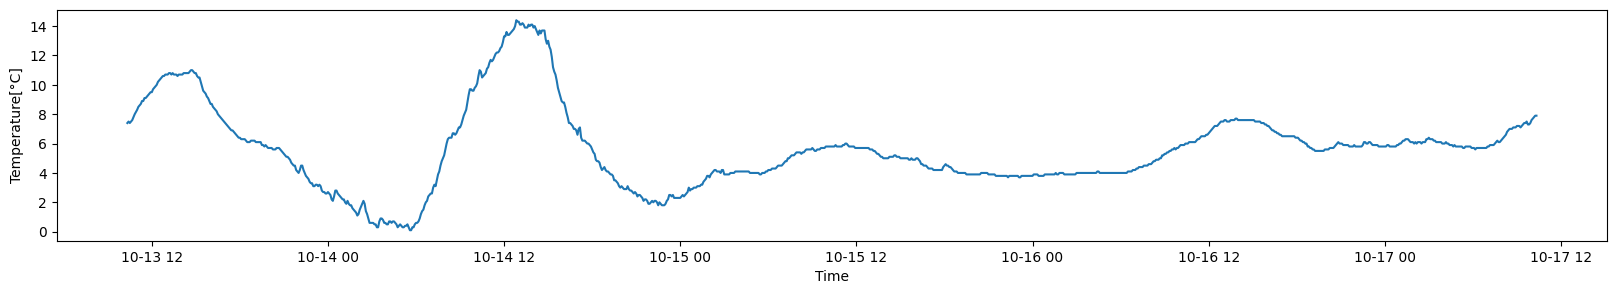

In [9]:
# zoomirano en dan
zoomed = lambda data, start_time, end_time: data[(data['timestamp'] >= start_time) & (data['timestamp'] <= end_time)]
train_processed_without_index = train_processed.reset_index()
train_processed_zoomed = zoomed(train_processed_without_index, '2020-10-13 10:20:00', '2020-10-17 10:20:00')
train_processed_zoomed
plt.figure(figsize=(20, 3))
plt.plot(train_processed_zoomed["timestamp"], train_processed_zoomed["AMBIENT_TEMPERATURE"])
plt.xlabel("Time")
plt.ylabel("Temperature[°C]")

In [16]:

# xgboost algoritem
path_xgb = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_xgb.csv'
predictions_xgb_72h = predict(path_xgb, test_processed)
test_compare_72h = test_processed_compare(test_processed, '2023-01-03 23:55:00')
#compute_error = lambda test_values, predictions, alg: test_values["AMBIENT_TEMPERATURE"].values - predictions[alg].values
#error_xgb = compute_error(test_compare, predictions_xgb, "XGBRegressor")

'''# randomforest
path_randomforest = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features.csv'
predictions_randomforest = predict(path_randomforest, test_processed)
error_randomforest = compute_error(test_compare, predictions_randomforest, "RandomForestRegressor")

#lgbm
path_lgbm = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_lgbm.csv'
predictions_lgbm = predict(path_lgbm, test_processed)
error_lgbm = compute_error(test_compare, predictions_lgbm, "LGBMRegressor")'''





'# randomforest\npath_randomforest = r\'/home/iva/Desktop/operato-meteo-1/predictions_auto_features.csv\'\npredictions_randomforest = predict(path_randomforest, test_processed)\nerror_randomforest = compute_error(test_compare, predictions_randomforest, "RandomForestRegressor")\n\n#lgbm\npath_lgbm = r\'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_lgbm.csv\'\npredictions_lgbm = predict(path_lgbm, test_processed)\nerror_lgbm = compute_error(test_compare, predictions_lgbm, "LGBMRegressor")'

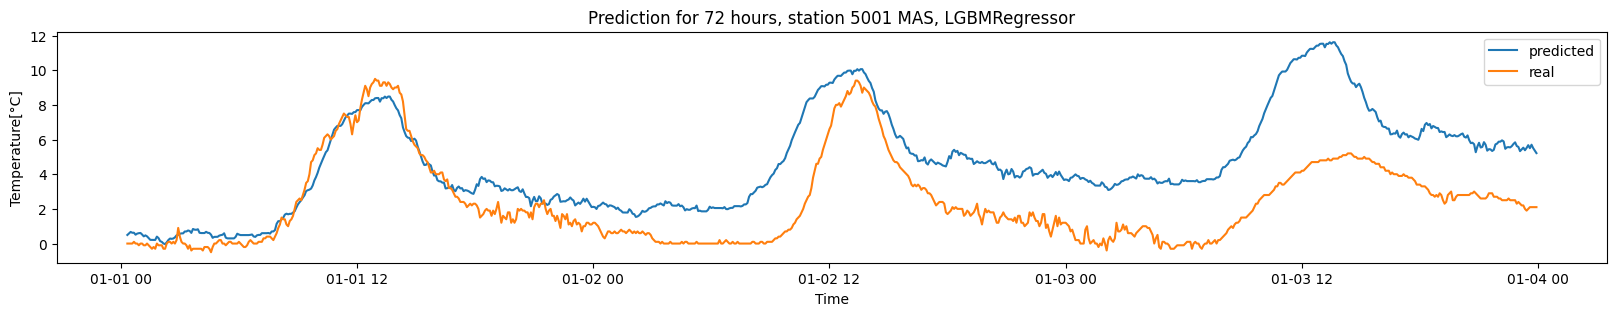

In [8]:
plot_compare(predictions_lgbm, "LGBMRegressor", test_compare)

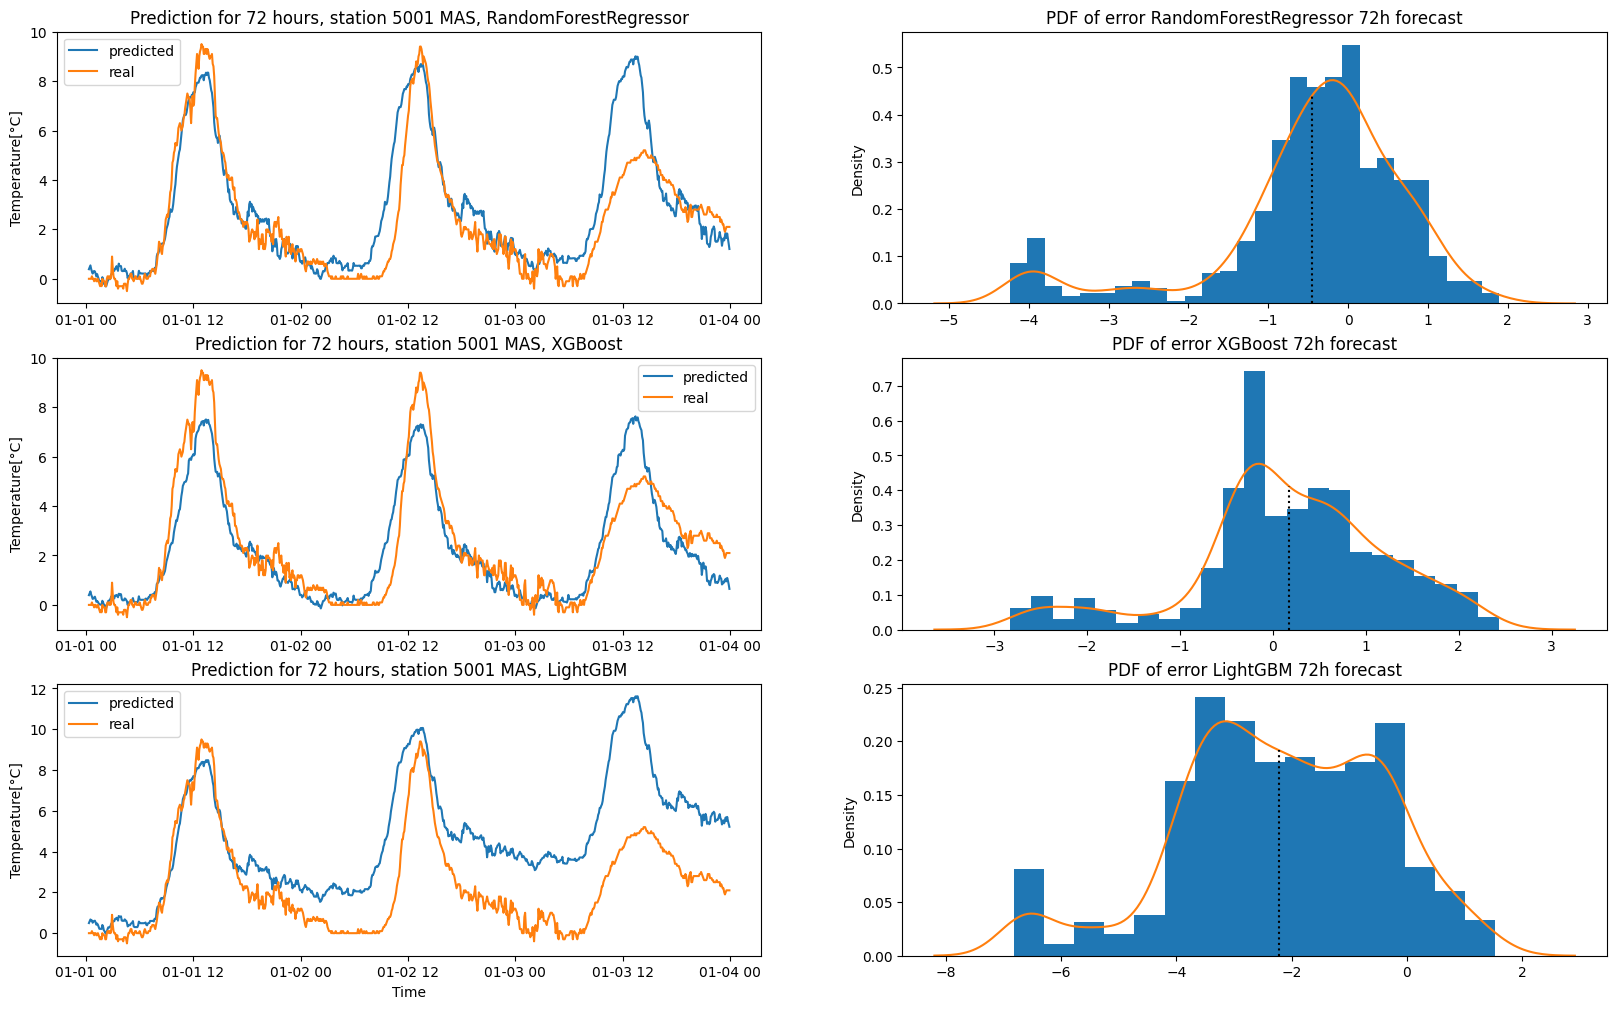

In [21]:
figs, axs = plt.subplots(3, 2, figsize=(20, 12))
predictions_list = [predictions_randomforest, predictions_xgb, predictions_lgbm]
errors = [error_randomforest, error_xgb, error_lgbm]
errors_mean = [error_randomforest.mean(), error_xgb.mean(), error_lgbm.mean()]
algorithms = ["RandomForestRegressor", "XGBoost", "LightGBM"]

ind_1 = [0, 1]
ind_2 = [0, 0]
ind_3 = [0, 1]
ind_4 = [1, 1]
ind_5 = [2, 2]
ind_6 = [0, 1]

for i, j, k, z, f, g in zip(ind_1, ind_2, ind_3, ind_4, ind_5, ind_6):
    axs[i, j].plot(predictions_list[i].index, predictions_list[i].values[:, 1], label="predicted")
    axs[i, j].plot(test_compare.index, test_compare.values, label="real")
    axs[k, z].hist(errors[i], bins='auto', density=True)
    axs[i, j].set_title(f"Prediction for 72 hours, station 5001 MAS, {algorithms[i]}")
    axs[2, 0].set_xlabel("Time")
    axs[i, j].set_ylabel("Temperature[°C]")
    axs[i, j].legend()
    axs[k, z].set_title(f"PDF of error {algorithms[i]} 72h forecast")
    ax = sns.kdeplot(data=errors[i], ax=axs[k, z])
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(errors_mean[i], xs, ys)
    ax.vlines(errors_mean[i], 0, height, color='black', ls=':')
axs[2, 0].plot(predictions_list[2].index, predictions_list[2].values[:, 1], label="predicted")
axs[2, 0].plot(test_compare.index, test_compare.values, label="real")
axs[2, 0].set_title(f"Prediction for 72 hours, station 5001 MAS, {algorithms[2]}")
axs[2, 0].set_xlabel("Time")
axs[2, 0].set_ylabel("Temperature[°C]")
axs[2, 0].legend()
axs[2, 1].set_title(f"PDF of error {algorithms[2]} 72h forecast")
axs[2, 1].hist(errors[2], bins='auto', density=True)
ax = sns.kdeplot(data=errors[2], ax=axs[2, 1])
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(errors_mean[2], xs, ys)
ax.vlines(errors_mean[2], 0, height, color='black', ls=':')




In [42]:
# wind direction
data = Preparation(r'/home/iva/Desktop/operato-meteo-1/data/MAS_processed/ELES-MAS-5001.csv.gz', "WIND_DIRECTION")
train, test = data.split()
train_processed = remove_duplicates(train)
test_processed = remove_duplicates(test)
test_processed

,WIND_DIRECTION
timestamp,
2023-01-01 00:20:00,325.0
2023-01-01 00:25:00,328.0
2023-01-01 00:30:00,335.0
2023-01-01 00:35:00,325.0
2023-01-01 00:40:00,325.0
...,...
2023-05-31 21:35:00,156.0
2023-05-31 21:40:00,157.0
2023-05-31 21:45:00,162.0


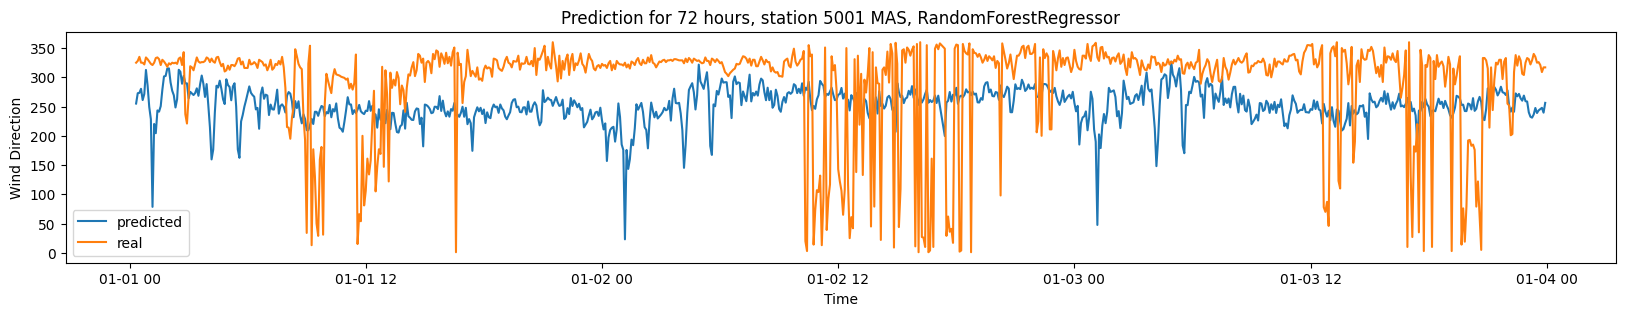

In [5]:
# wind direction
data = Preparation(r'/home/iva/Desktop/operato-meteo-1/data/MAS_processed/ELES-MAS-5001.csv.gz', "WIND_DIRECTION")
train, test = data.split()
train_processed = remove_duplicates(train)
test_processed = remove_duplicates(test)

path_rf = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_randomforest_wind_direction.csv'
predictions_rf = predict(path_rf, test_processed)
test_compare = test_processed_compare(test_processed, '2023-01-03 23:55:00')
compute_error = lambda test_values, predictions, alg: test_values["WIND_DIRECTION"].values - predictions[alg].values
error_rf = compute_error(test_compare, predictions_rf, "RandomForestRegressor")
plot_compare(predictions_rf, "RandomForestRegressor", test_compare)


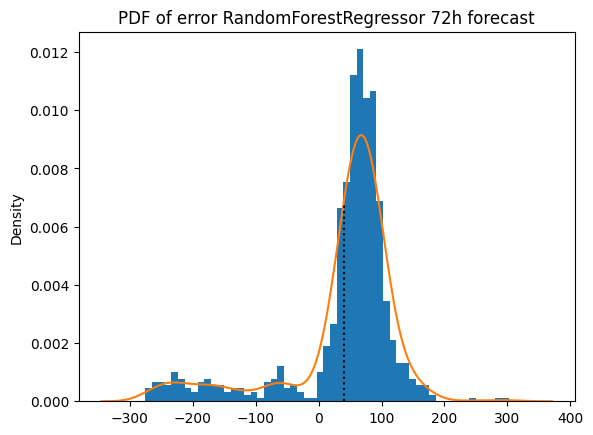

In [6]:
pdf(test_compare, predictions_rf, "RandomForestRegressor")

In [ ]:
# forecasting 24 h
# xgboost algoritem
path_xgb = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_xgb.csv'
predictions_xgb = predict(path_xgb, test_processed)
test_compare = test_processed_compare(test_processed, '2023-01-03 23:55:00')
compute_error = lambda test_values, predictions, alg: test_values["AMBIENT_TEMPERATURE"].values - predictions[alg].values
error_xgb = compute_error(test_compare, predictions_xgb, "XGBRegressor")

# randomforest
path_randomforest = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features.csv'
predictions_randomforest = predict(path_randomforest, test_processed)
error_randomforest = compute_error(test_compare, predictions_randomforest, "RandomForestRegressor")

#lgbm
path_lgbm = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_lgbm.csv'
predictions_lgbm = predict(path_lgbm, test_processed)
error_lgbm = compute_error(test_compare, predictions_lgbm, "LGBMRegressor")

In [9]:
# randomforest
path_randomforest_24h = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_randomforest_24h.csv'
predictions_rf_24 = pd.read_csv(path_randomforest_24h)
predictions_rf_24 = predictions_rf_24[predictions_rf_24["ds"] >= '2023-01-01 00:20:00']
predictions_rf_24["ds"] = pd.to_datetime(predictions_rf_24["ds"])
test_compare = test_processed_compare(test_processed, '2023-01-01 23:55:00')
#error_randomforest_24h = compute_error(test_compare, predictions_randomforest_24h, "RandomForestRegressor")
predictions_rf_24

,unique_id,ds,RandomForestRegressor
4,AMBIENT_TEMPERATURE,2023-01-01 00:20:00,0.387
5,AMBIENT_TEMPERATURE,2023-01-01 00:25:00,0.464
6,AMBIENT_TEMPERATURE,2023-01-01 00:30:00,0.542
7,AMBIENT_TEMPERATURE,2023-01-01 00:35:00,0.395
8,AMBIENT_TEMPERATURE,2023-01-01 00:40:00,0.295
...,...,...,...
283,AMBIENT_TEMPERATURE,2023-01-01 23:35:00,1.135
284,AMBIENT_TEMPERATURE,2023-01-01 23:40:00,1.324
285,AMBIENT_TEMPERATURE,2023-01-01 23:45:00,1.126
286,AMBIENT_TEMPERATURE,2023-01-01 23:50:00,0.926


Text(0, 0.5, 'Temperature[°C]')

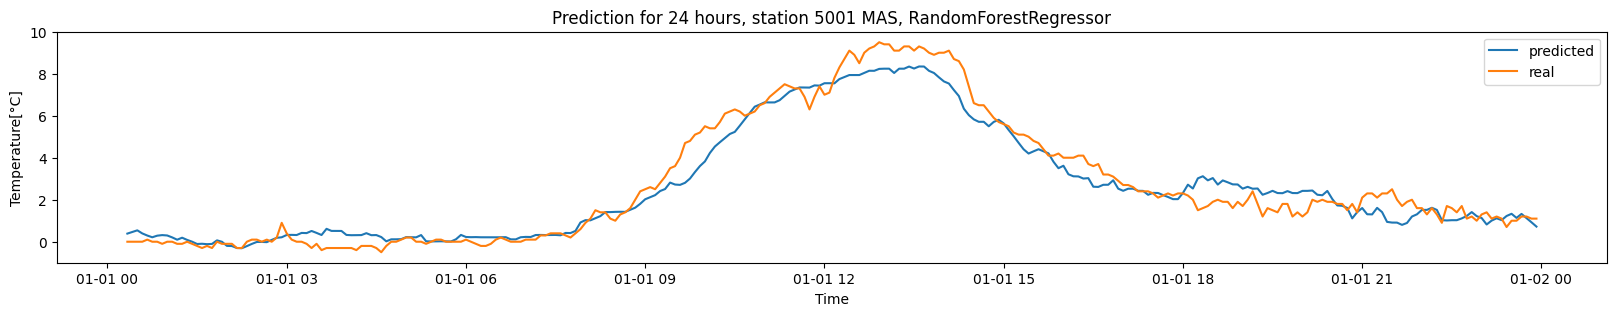

In [21]:
plt.figure(figsize=(20, 3))
plt.title(f"Prediction for 24 hours, station 5001 MAS, RandomForestRegressor")
plt.plot(predictions_rf_24["ds"], predictions_rf_24["RandomForestRegressor"], label="predicted")
plt.plot(test_compare.index, test_compare.values, label="real")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature[°C]")





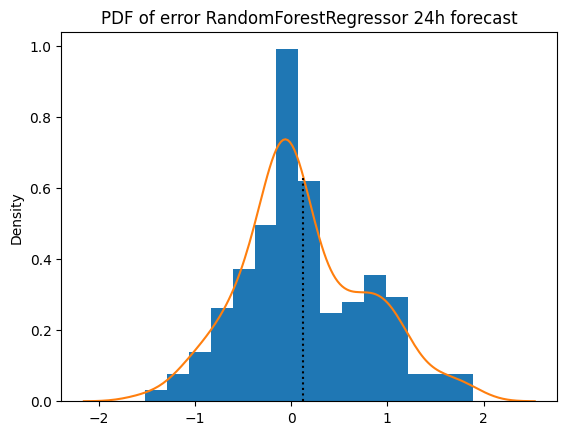

In [22]:
error_rf_24 = test_compare["AMBIENT_TEMPERATURE"].values - predictions_rf_24["RandomForestRegressor"].values
plt.hist(error_rf_24, bins='auto', density=True)
plt.title(f"PDF of error RandomForestRegressor 24h forecast")
mean_error = error_rf_24.mean()
ax = sns.kdeplot(data=error_rf_24)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean_error, xs, ys)
ax.vlines(mean_error, 0, height, color='black', ls=':')
plt.show()

In [15]:
# xgb 24h forecast
path_xgb_24h = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_xgb_24h.csv'
predictions_xgb_24 = pd.read_csv(path_xgb_24h)
predictions_xgb_24 = predictions_xgb_24[predictions_xgb_24["ds"] >= '2023-01-01 00:20:00']
predictions_xgb_24["ds"] = pd.to_datetime(predictions_xgb_24["ds"])
test_compare_24h = test_processed_compare(test_processed, '2023-01-01 23:55:00')
#error_randomforest_24h = compute_error(test_compare, predictions_randomforest_24h, "RandomForestRegressor")
predictions_xgb_24

,unique_id,ds,XGBRegressor
4,AMBIENT_TEMPERATURE,2023-01-01 00:20:00,0.394840
5,AMBIENT_TEMPERATURE,2023-01-01 00:25:00,0.474862
6,AMBIENT_TEMPERATURE,2023-01-01 00:30:00,0.545577
7,AMBIENT_TEMPERATURE,2023-01-01 00:35:00,0.415892
8,AMBIENT_TEMPERATURE,2023-01-01 00:40:00,0.342110
...,...,...,...
283,AMBIENT_TEMPERATURE,2023-01-01 23:35:00,0.693464
284,AMBIENT_TEMPERATURE,2023-01-01 23:40:00,0.772518
285,AMBIENT_TEMPERATURE,2023-01-01 23:45:00,0.680416
286,AMBIENT_TEMPERATURE,2023-01-01 23:50:00,0.542393


In [25]:
error_xgb_24 = test_compare["AMBIENT_TEMPERATURE"].values - predictions_xgb_24["XGBRegressor"].values
error_xgb_24


array([-3.94840120e-01, -4.74861920e-01, -5.45576750e-01, -4.15891500e-01,
       -2.42109800e-01, -2.42074970e-01, -2.56298100e-01, -4.02346970e-01,
       -3.31235100e-01, -2.34668880e-01, -2.27209080e-01, -2.57659350e-01,
       -1.24313220e-01, -1.63204720e-01, -2.28682714e-01, -3.10042375e-01,
       -2.12691742e-01, -3.13190156e-01, -1.66786770e-01, -1.98408446e-01,
       -8.14493360e-02, -1.05044818e-01, -2.26310680e-01, -1.63887490e-01,
        3.07444930e-02,  2.55624900e-02, -6.44168000e-02, -1.74167020e-01,
       -1.00587530e-01, -2.58917600e-01, -1.47068130e-01,  6.07169470e-01,
        6.25098000e-02, -1.89675000e-01, -2.61129650e-01, -3.77076630e-01,
       -4.84481160e-01, -7.02940570e-01, -4.52093130e-01, -7.09067200e-01,
       -7.51724500e-01, -7.39094160e-01, -6.97030200e-01, -7.31903700e-01,
       -5.44496570e-01, -4.85845090e-01, -5.85845090e-01, -3.85845090e-01,
       -4.62299950e-01, -4.44496570e-01, -4.95043270e-01, -6.46527600e-01,
       -1.96863288e-01, -

In [27]:
# lgbm 24h forecast
path_lgbm_24h = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_lgbm_24h.csv'
predictions_lgbm_24 = pd.read_csv(path_lgbm_24h)
predictions_lgbm_24 = predictions_lgbm_24[predictions_lgbm_24["ds"] >= '2023-01-01 00:20:00']
predictions_lgbm_24["ds"] = pd.to_datetime(predictions_lgbm_24["ds"])
predictions_lgbm_24

,unique_id,ds,LGBMRegressor
4,AMBIENT_TEMPERATURE,2023-01-01 00:20:00,0.495674
5,AMBIENT_TEMPERATURE,2023-01-01 00:25:00,0.588039
6,AMBIENT_TEMPERATURE,2023-01-01 00:30:00,0.671573
7,AMBIENT_TEMPERATURE,2023-01-01 00:35:00,0.623246
8,AMBIENT_TEMPERATURE,2023-01-01 00:40:00,0.625745
...,...,...,...
283,AMBIENT_TEMPERATURE,2023-01-01 23:35:00,2.418084
284,AMBIENT_TEMPERATURE,2023-01-01 23:40:00,2.585354
285,AMBIENT_TEMPERATURE,2023-01-01 23:45:00,2.426418
286,AMBIENT_TEMPERATURE,2023-01-01 23:50:00,2.271006


In [28]:
error_lgbm_24 = test_compare["AMBIENT_TEMPERATURE"].values - predictions_lgbm_24["LGBMRegressor"].values
error_lgbm_24

array([-4.95673840e-01, -5.88038887e-01, -6.71573123e-01, -6.23246378e-01,
       -5.25745347e-01, -5.11748622e-01, -5.74143247e-01, -6.98542092e-01,
       -6.10951055e-01, -5.20469026e-01, -5.15003936e-01, -5.72496392e-01,
       -4.15003936e-01, -4.12496970e-01, -4.13581824e-01, -5.09174950e-01,
       -4.09174950e-01, -5.09174950e-01, -4.01522340e-01, -4.14263080e-01,
       -2.40653263e-01, -1.96615950e-01, -3.04504476e-01, -2.65190291e-01,
       -7.05098569e-02, -1.01522340e-01, -1.89845540e-01, -2.72496392e-01,
       -1.91231505e-01, -3.57314689e-01, -2.74143247e-01,  4.02455901e-01,
       -1.63707004e-01, -4.86894856e-01, -5.86894856e-01, -6.96734494e-01,
       -7.96734494e-01, -1.05489170e+00, -8.24875063e-01, -1.01461196e+00,
       -1.14144280e+00, -1.10143345e+00, -1.09428262e+00, -1.12487506e+00,
       -9.21091865e-01, -9.05934528e-01, -1.00593453e+00, -8.05934528e-01,
       -8.76351036e-01, -8.21091865e-01, -9.09403007e-01, -1.01211890e+00,
       -5.29430427e-01, -

In [35]:
predictions_list[0][algorithms[0]]

4      0.387
5      0.464
6      0.542
7      0.395
8      0.295
       ...  
283    1.135
284    1.324
285    1.126
286    0.926
287    0.721
Name: RandomForestRegressor, Length: 284, dtype: float64

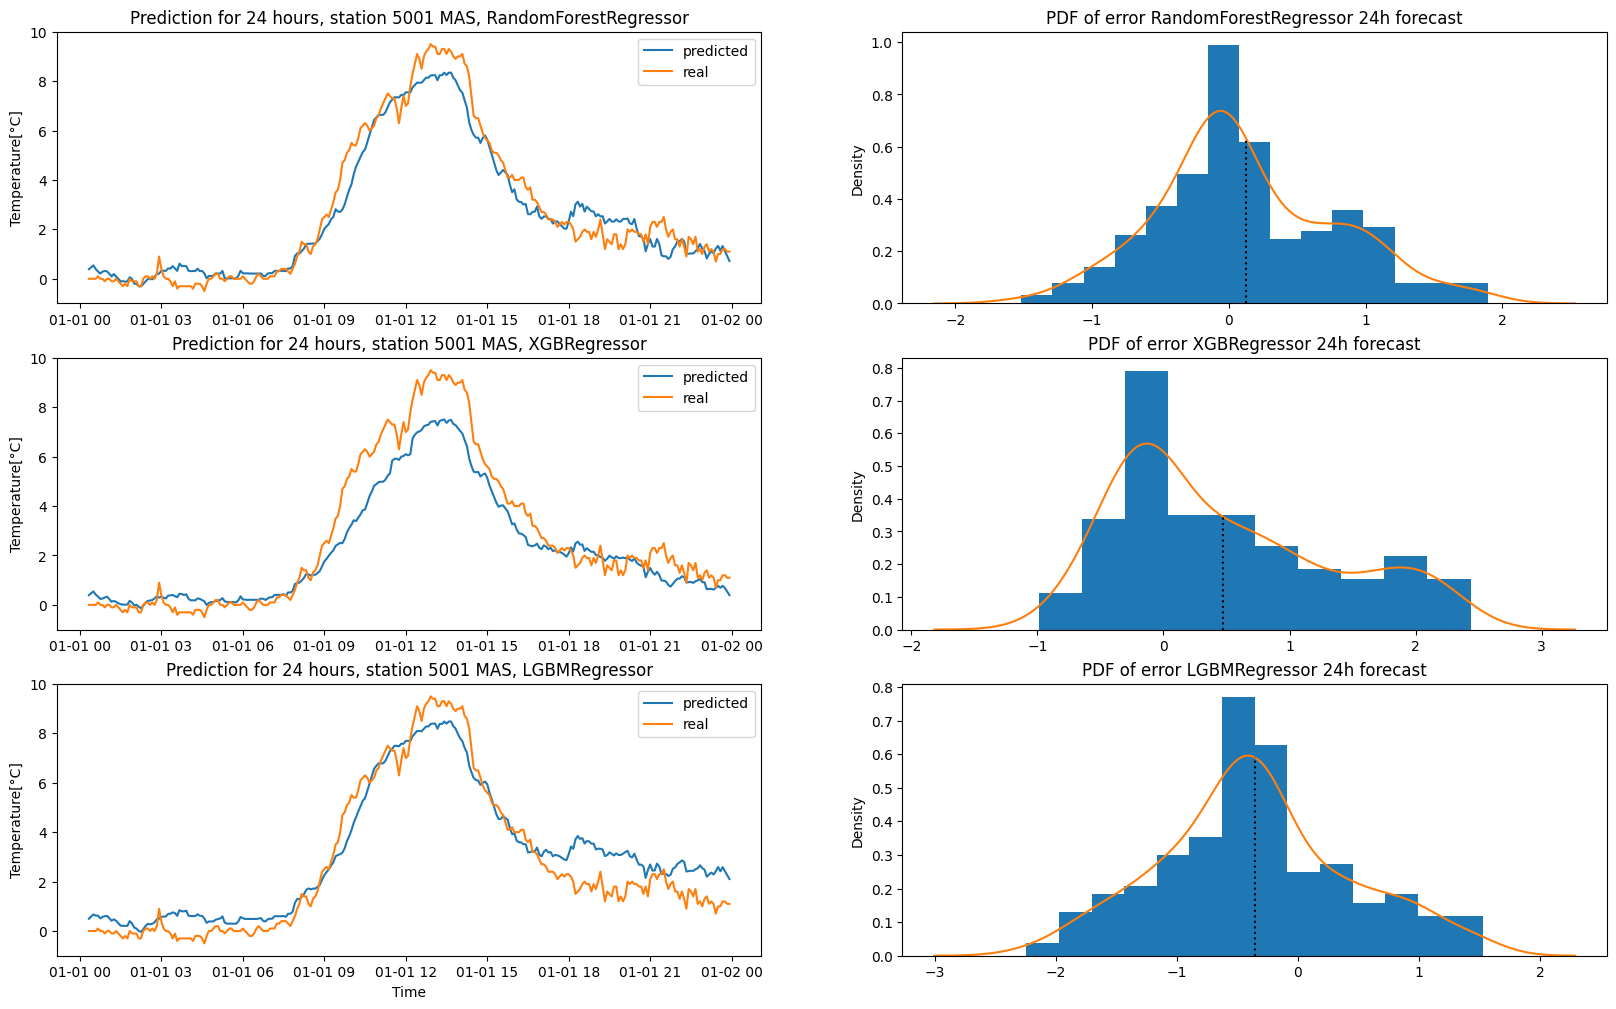

In [37]:
figs, axs = plt.subplots(3, 2, figsize=(20, 12))
predictions_list = [predictions_rf_24, predictions_xgb_24, predictions_lgbm_24]
errors = [error_rf_24, error_xgb_24, error_lgbm_24]
errors_mean = [error_rf_24.mean(), error_xgb_24.mean(), error_lgbm_24.mean()]
algorithms = ["RandomForestRegressor", "XGBRegressor", "LGBMRegressor"]

ind_1 = [0, 1]
ind_2 = [0, 0]
ind_3 = [0, 1]
ind_4 = [1, 1]
ind_5 = [2, 2]
ind_6 = [0, 1]

for i, j, k, z, f, g in zip(ind_1, ind_2, ind_3, ind_4, ind_5, ind_6):
    axs[i, j].plot(predictions_list[i]["ds"], predictions_list[i][algorithms[i]], label="predicted")
    axs[i, j].plot(test_compare.index, test_compare.values, label="real")
    axs[k, z].hist(errors[i], bins='auto', density=True)
    axs[i, j].set_title(f"Prediction for 24 hours, station 5001 MAS, {algorithms[i]}")
    axs[2, 0].set_xlabel("Time")
    axs[i, j].set_ylabel("Temperature[°C]")
    axs[i, j].legend()
    axs[k, z].set_title(f"PDF of error {algorithms[i]} 24h forecast")
    ax = sns.kdeplot(data=errors[i], ax=axs[k, z])
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(errors_mean[i], xs, ys)
    ax.vlines(errors_mean[i], 0, height, color='black', ls=':')
axs[2, 0].plot(predictions_list[2]["ds"], predictions_list[2][algorithms[2]], label="predicted")
axs[2, 0].plot(test_compare.index, test_compare.values, label="real")
axs[2, 0].set_title(f"Prediction for 24 hours, station 5001 MAS, {algorithms[2]}")
axs[2, 0].set_xlabel("Time")
axs[2, 0].set_ylabel("Temperature[°C]")
axs[2, 0].legend()
axs[2, 1].set_title(f"PDF of error {algorithms[2]} 24h forecast")
axs[2, 1].hist(errors[2], bins='auto', density=True)
ax = sns.kdeplot(data=errors[2], ax=axs[2, 1])
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(errors_mean[2], xs, ys)
ax.vlines(errors_mean[2], 0, height, color='black', ls=':')

In [47]:
# wind direction
data = Preparation(r'/home/iva/Desktop/operato-meteo-1/data/MAS_processed/ELES-MAS-5001.csv.gz', "WIND_DIRECTION")
train, test = data.split()
train_processed = remove_duplicates(train)
test_processed = remove_duplicates(test)

path_rf_24_wind_direction = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_rf_24h_wind_direction.csv'
predictions_rf_24_wind_direction = pd.read_csv(path_rf_24_wind_direction)
predictions_rf_24_wind_direction = predictions_rf_24_wind_direction[predictions_rf_24_wind_direction["ds"] >= '2023-01-01 00:20:00']
predictions_rf_24_wind_direction["ds"] = pd.to_datetime(predictions_rf_24_wind_direction["ds"])
test_compare = test_processed_compare(test_processed, '2023-01-01 23:55:00')
error_rf_24_wind_direction = test_compare["WIND_DIRECTION"].values - predictions_rf_24_wind_direction["RandomForestRegressor"].values



#predictions_rf = predict(path_rf, test_processed)
#test_compare = test_processed_compare(test_processed, '2023-01-03 23:55:00')
#compute_error = lambda test_values, predictions, alg: test_values["WIND_DIRECTION"].values - predictions[alg].values
#error_rf = compute_error(test_compare, predictions_rf, "RandomForestRegressor")
#plot_compare(predictions_rf, "RandomForestRegressor", test_compare)

Text(0, 0.5, 'Wind DIrection')

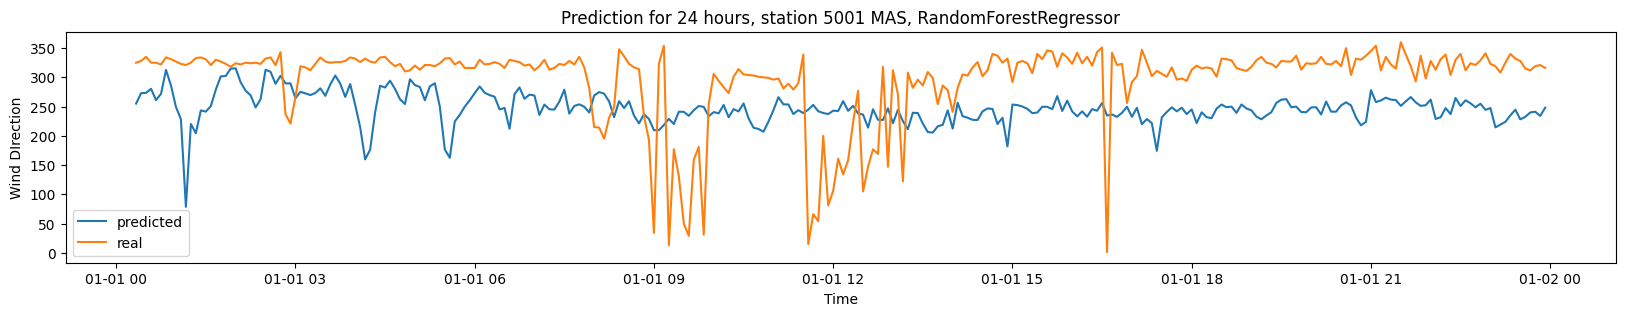

In [45]:
plt.figure(figsize=(20, 3))
plt.title(f"Prediction for 24 hours, station 5001 MAS, RandomForestRegressor")
plt.plot(predictions_rf_24_wind_direction["ds"], predictions_rf_24_wind_direction["RandomForestRegressor"], label="predicted")
plt.plot(test_compare.index, test_compare.values, label="real")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Wind DIrection")

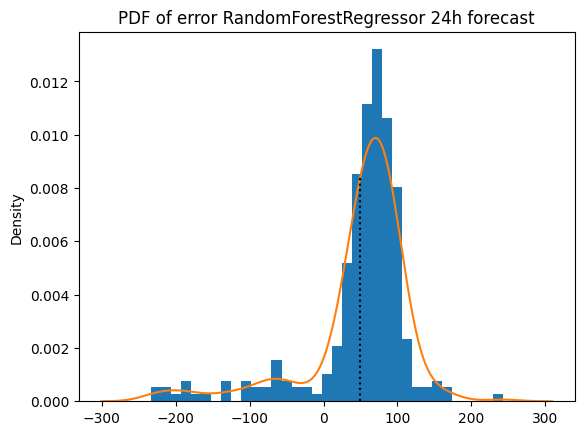

In [52]:
plt.hist(error_rf_24_wind_direction, bins='auto', density=True)
plt.title(f"PDF of error RandomForestRegressor 24h forecast")
mean_error = error_rf_24_wind_direction.mean()
ax = sns.kdeplot(data=error_rf_24_wind_direction)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean_error, xs, ys)
ax.vlines(mean_error, 0, height, color='black', ls=':')
plt.show()

In [67]:
# missing timestamps for wind direction
data = Preparation(r'/home/iva/Desktop/operato-meteo-1/data/MAS_processed/ELES-MAS-5001.csv.gz', "WIND_DIRECTION")
train, test = data.split()
train_processed = remove_duplicates(train)
missing_timestamps_train, missing_values_filled_previous_train = missing_data(train_processed)
test_processed = remove_duplicates(test)
missing_timestamps_test, missing_values_filled_previous_test = missing_data(test_processed)


/home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


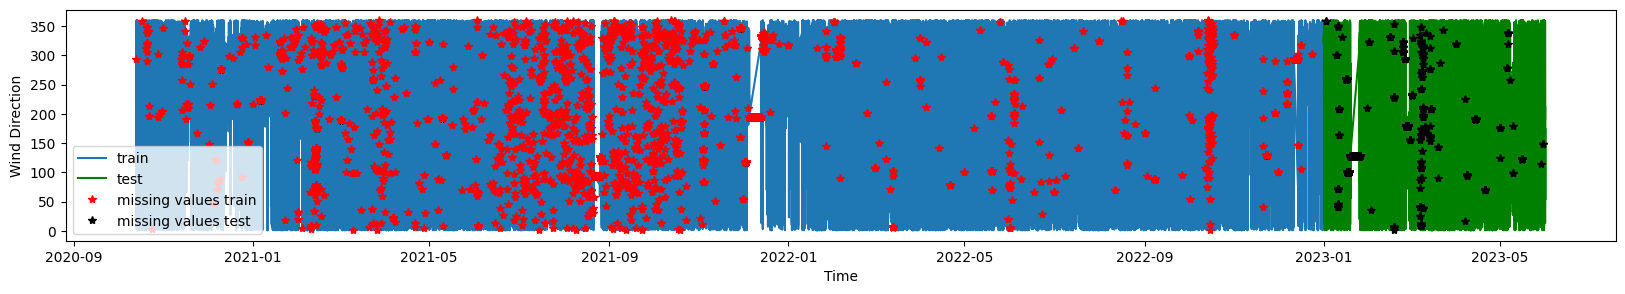

In [56]:
fig, ax = plt.subplots(figsize=(20, 3))
plt.plot(train_processed.index, train_processed.values, label='train')
plt.plot(test_processed.index, test_processed.values, 'g', label='test')
for t, v in zip(missing_timestamps_train, missing_values_filled_previous_train):
    ax.plot(t, v, 'r*', linewidth=0.1)
plt.plot(missing_timestamps_train[-1], missing_values_filled_previous_train[-1], 'r*', label='missing values train')
for t, v in zip(missing_timestamps_test, missing_values_filled_previous_test):
    ax.plot(t, v, 'k*', linewidth=0.1)
plt.plot(missing_timestamps_test[-1], missing_values_filled_previous_test[-1], 'k*', label='missing values test')
plt.xlabel("Time")
plt.ylabel("Wind Direction")
plt.legend()

In [6]:
# xgb 1h
path_xgb_1h = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_xgb_1h.csv'
predictions_xgb_1h = pd.read_csv(path_xgb_1h)
predictions_xgb_1h = predictions_xgb_1h[predictions_xgb_1h["ds"] >= '2023-01-01 00:20:00']
predictions_xgb_1h["ds"] = pd.to_datetime(predictions_xgb_1h["ds"])
test_compare_1h = test_processed_compare(test_processed, '2023-01-01 00:55:00')

In [9]:
# xgb 12h
path_xgb_12h = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_xgb_12h.csv'
predictions_xgb_12h = pd.read_csv(path_xgb_12h)
predictions_xgb_12h = predictions_xgb_12h[predictions_xgb_12h["ds"] >= '2023-01-01 00:20:00']
predictions_xgb_12h["ds"] = pd.to_datetime(predictions_xgb_12h["ds"])
test_compare_12h = test_processed_compare(test_processed, '2023-01-01 11:55:00')

In [14]:
# xgb 36h
path_xgb_36h = r'/home/iva/Desktop/operato-meteo-1/predictions_auto_features_xgb_36h.csv'
predictions_xgb_36h = pd.read_csv(path_xgb_36h)
predictions_xgb_36h = predictions_xgb_36h[predictions_xgb_36h["ds"] >= '2023-01-01 00:20:00']
predictions_xgb_36h["ds"] = pd.to_datetime(predictions_xgb_36h["ds"])
test_compare_36h = test_processed_compare(test_processed, '2023-01-02 11:55:00')

In [26]:
predictions_xgb_72h.index

DatetimeIndex(['2023-01-01 00:20:00', '2023-01-01 00:25:00',
               '2023-01-01 00:30:00', '2023-01-01 00:35:00',
               '2023-01-01 00:40:00', '2023-01-01 00:45:00',
               '2023-01-01 00:50:00', '2023-01-01 00:55:00',
               '2023-01-01 01:00:00', '2023-01-01 01:05:00',
               ...
               '2023-01-03 23:10:00', '2023-01-03 23:15:00',
               '2023-01-03 23:20:00', '2023-01-03 23:25:00',
               '2023-01-03 23:30:00', '2023-01-03 23:35:00',
               '2023-01-03 23:40:00', '2023-01-03 23:45:00',
               '2023-01-03 23:50:00', '2023-01-03 23:55:00'],
              dtype='datetime64[ns]', name='ds', length=858, freq=None)

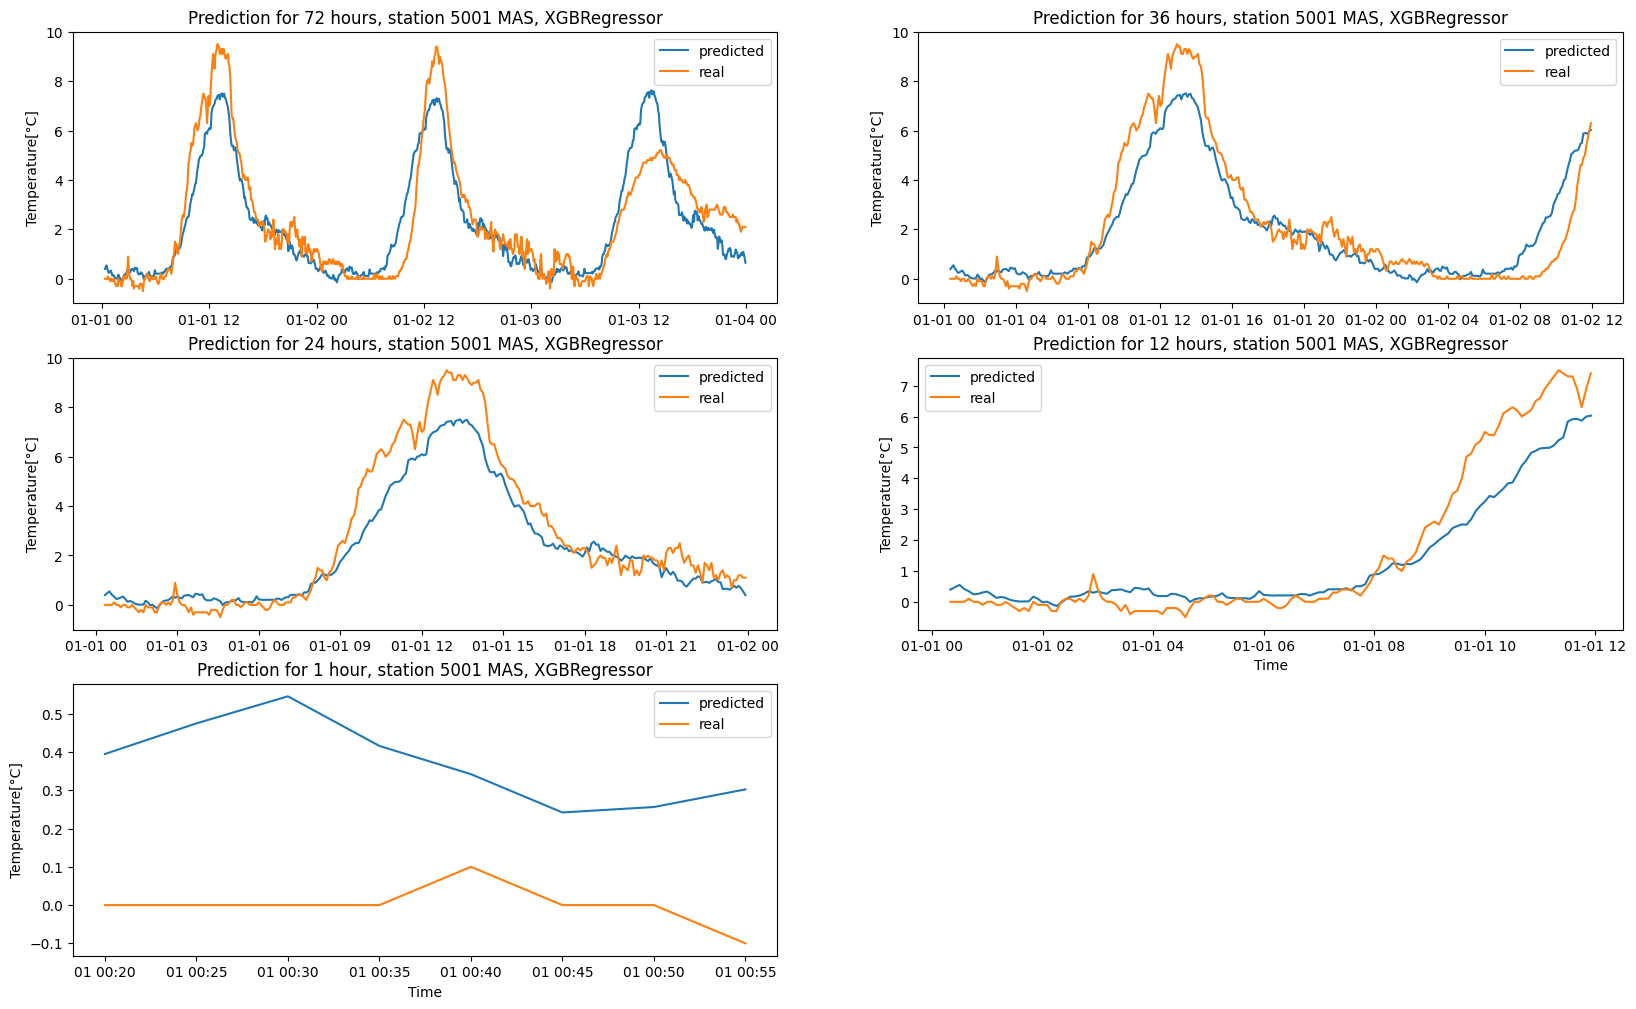

In [32]:
figs, axs = plt.subplots(3, 2, figsize=(20, 12))
predictions_list = [predictions_xgb_72h, predictions_xgb_36h, predictions_xgb_24, predictions_xgb_12h, predictions_xgb_1h]
test_compare_list = [test_compare_72h, test_compare_36h, test_compare_24h, test_compare_12h, test_compare_1h]
forecast_list = ["72h", "36h", "24h", "12h", "1h"]
#errors = [error_rf_24, error_xgb_24, error_lgbm_24]
#errors_mean = [error_rf_24.mean(), error_xgb_24.mean(), error_lgbm_24.mean()]
#algorithms = ["RandomForestRegressor", "XGBRegressor", "LGBMRegressor"]

ind_1 = [0, 1, 2]
ind_2 = [0, 0, 0]
ind_3 = [1, 1, 1]
#ind_4 = [1, 1]
#ind_5 = [2, 2]
#ind_6 = [0, 1]
axs[0, 0].plot(predictions_xgb_72h.index, predictions_xgb_72h["XGBRegressor"], label="predicted")
axs[0, 0].plot(test_compare_72h.index, test_compare_72h.values, label="real")
axs[0, 0].set_title("Prediction for 72 hours, station 5001 MAS, XGBRegressor")
#axs[0, 0 ].set_xlabel("Time")
axs[0, 0].set_ylabel("Temperature[°C]")
axs[0, 0].legend()

axs[0, 1].plot(predictions_xgb_36h["ds"], predictions_xgb_36h["XGBRegressor"], label="predicted")
axs[0, 1].plot(test_compare_36h.index, test_compare_36h.values, label="real")
axs[0, 1].set_title("Prediction for 36 hours, station 5001 MAS, XGBRegressor")
#axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Temperature[°C]")
axs[0, 1].legend()

axs[1, 0].plot(predictions_xgb_24["ds"], predictions_xgb_24["XGBRegressor"], label="predicted")
axs[1, 0].plot(test_compare_24h.index, test_compare_24h.values, label="real")
axs[1, 0].set_title("Prediction for 24 hours, station 5001 MAS, XGBRegressor")
#axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Temperature[°C]")
axs[1, 0].legend()

axs[1, 1].plot(predictions_xgb_12h["ds"], predictions_xgb_12h["XGBRegressor"], label="predicted")
axs[1, 1].plot(test_compare_12h.index, test_compare_12h.values, label="real")
axs[1, 1].set_title("Prediction for 12 hours, station 5001 MAS, XGBRegressor")
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_ylabel("Temperature[°C]")
axs[1, 1].legend()

axs[2, 0].plot(predictions_xgb_1h["ds"], predictions_xgb_1h["XGBRegressor"], label="predicted")
axs[2, 0].plot(test_compare_1h.index, test_compare_1h.values, label="real")
axs[2, 0].set_title("Prediction for 1 hour, station 5001 MAS, XGBRegressor")
axs[2, 0].set_xlabel("Time")
axs[2, 0].set_ylabel("Temperature[°C]")
axs[2, 0].legend()
figs.delaxes(axs[2, 1])



   

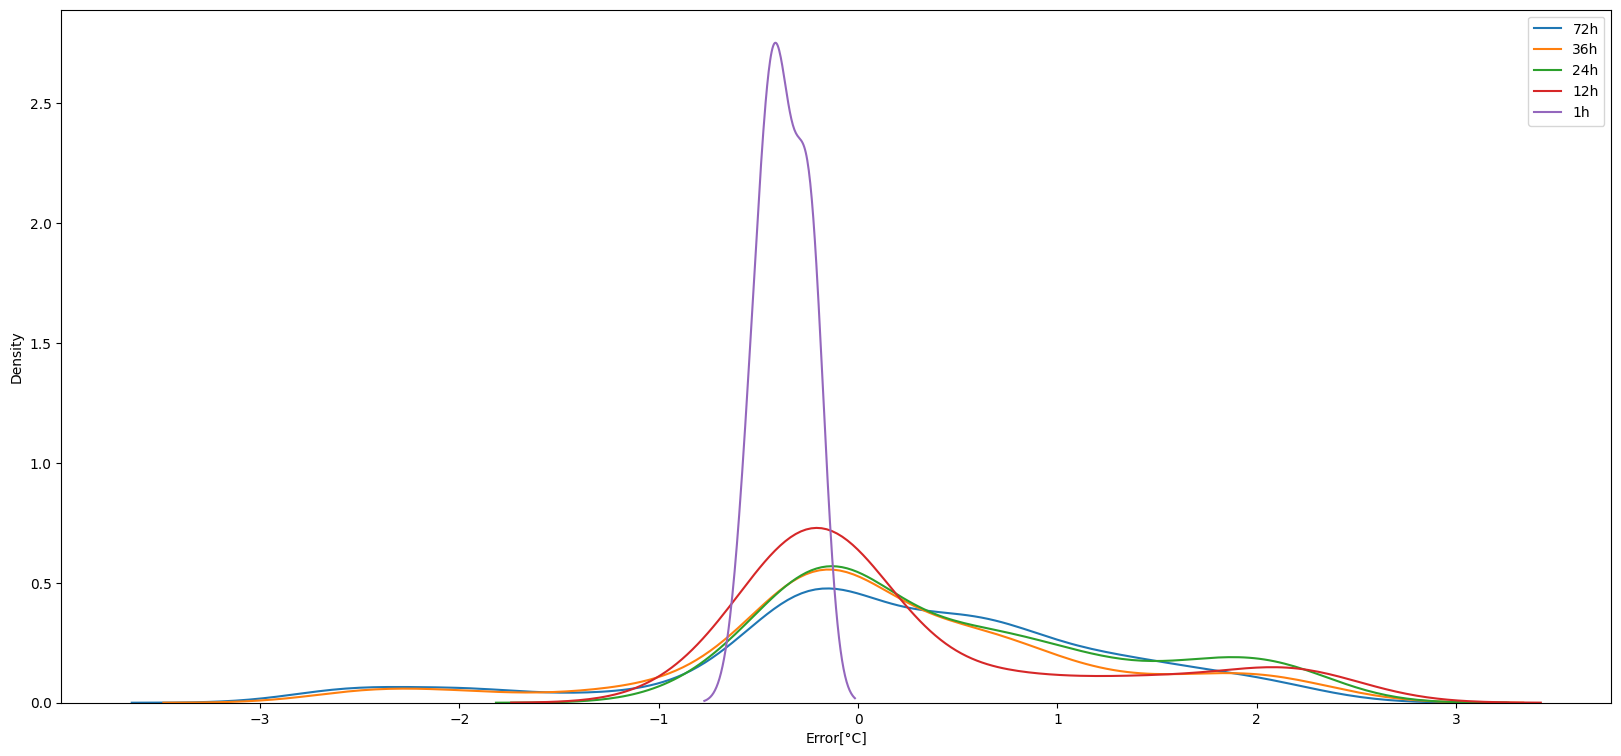

In [40]:
error_xgb_72h= test_compare_72h["AMBIENT_TEMPERATURE"].values - predictions_xgb_72h["XGBRegressor"].values
error_xgb_36h= test_compare_36h["AMBIENT_TEMPERATURE"].values - predictions_xgb_36h["XGBRegressor"].values
error_xgb_24= test_compare_24h["AMBIENT_TEMPERATURE"].values - predictions_xgb_24["XGBRegressor"].values
error_xgb_12h= test_compare_12h["AMBIENT_TEMPERATURE"].values - predictions_xgb_12h["XGBRegressor"].values
error_xgb_1h= test_compare_1h["AMBIENT_TEMPERATURE"].values - predictions_xgb_1h["XGBRegressor"].values


#plt.hist(error_xgb_24, bins='auto', density=True)
#plt.title(f"PDF of error XGBRegressor 24h forecast")
#mean_error = error_rf_24.mean()
plt.figure(figsize=(20, 9))
sns.kdeplot(data=error_xgb_72h, label="72h")
sns.kdeplot(data=error_xgb_36h, label="36h")
sns.kdeplot(data=error_xgb_24, label="24h")
sns.kdeplot(data=error_xgb_12h, label="12h")
sns.kdeplot(data=error_xgb_1h, label="1h")
plt.xlabel("Error[°C]")
plt.legend()





#kdeline = ax.lines[0]
#xs = kdeline.get_xdata()
#ys = kdeline.get_ydata()
#height = np.interp(mean_error, xs, ys)
#ax.vlines(mean_error, 0, height, color='black', ls=':')
#plt.show()



In [41]:
# continuous multiple horizons, for example first 1h forecast, than 12h, and the first hour of the 12h use the predictions returned from 1h
predictions_xgb_1h

,unique_id,ds,XGBRegressor
4,AMBIENT_TEMPERATURE,2023-01-01 00:20:00,0.394840
5,AMBIENT_TEMPERATURE,2023-01-01 00:25:00,0.474862
6,AMBIENT_TEMPERATURE,2023-01-01 00:30:00,0.545577
7,AMBIENT_TEMPERATURE,2023-01-01 00:35:00,0.415892
8,AMBIENT_TEMPERATURE,2023-01-01 00:40:00,0.342110
9,AMBIENT_TEMPERATURE,2023-01-01 00:45:00,0.242075
10,AMBIENT_TEMPERATURE,2023-01-01 00:50:00,0.256298
11,AMBIENT_TEMPERATURE,2023-01-01 00:55:00,0.302347


In [43]:
predictions_xgb_12h[predictions_xgb_12h["ds"]<='2023-01-01 00:55:00']

,unique_id,ds,XGBRegressor
4,AMBIENT_TEMPERATURE,2023-01-01 00:20:00,0.394840
5,AMBIENT_TEMPERATURE,2023-01-01 00:25:00,0.474862
6,AMBIENT_TEMPERATURE,2023-01-01 00:30:00,0.545577
7,AMBIENT_TEMPERATURE,2023-01-01 00:35:00,0.415892
8,AMBIENT_TEMPERATURE,2023-01-01 00:40:00,0.342110
9,AMBIENT_TEMPERATURE,2023-01-01 00:45:00,0.242075
10,AMBIENT_TEMPERATURE,2023-01-01 00:50:00,0.256298
11,AMBIENT_TEMPERATURE,2023-01-01 00:55:00,0.302347


In [ ]:
# processed temperature data
data = Preparation(r'/home/iva/Desktop/operato-meteo-1/data/MAS_processed/ELES-MAS-5001.csv.gz', "AMBIENT_TEMPERATURE")
train, test = data.split()
train_processed = remove_duplicates(train)
missing_timestamps_train, missing_values_filled_previous_train = missing_data(train_processed)
test_processed = remove_duplicates(test)
missing_timestamps_test, missing_values_filled_previous_test = missing_data(test_processed)

# processed wind direction data
data_wind = Preparation(r'/home/iva/Desktop/operato-meteo-1/data/MAS_processed/ELES-MAS-5001.csv.gz', "WIND_DIRECTION")
train_wind, test_wind = data_wind.split()
train_processed_wind = remove_duplicates(train_wind)
test_processed_wind = remove_duplicates(test_wind)
test_processed_wind





In [4]:
import glob
# Directory containing the .csv files (it creates a list of .csv.gz files that are stored in the temporary directory created above)
csv_files = glob.glob('/home/iva/Desktop/operato_weather_data/raw_data/MAS-EXPORT-OCT2020-MAY2023/*.csv.gz')
csv_files.sort()
csv_files_sub = [csv_files[n:n + 4] for n in range(0, len(csv_files), 4)]

'''station_id = 0 # Counter for our file_names list

# The idea involves parsing through a list of sublists and simultaneously iterating through each sublist while concatenating them
for sub_list in csv_files_sub:

    # Initialize the error counters for each parameter
    temp_error = wind_dir_error = wind_speed_error = air_pressure_error = solar_rad_error = rain_intensity_error = 0

    df_list = [] # List to store individual DataFrames

    # For loop that iterates through each sublist
    for i in sub_list:
        df_merge = pd.read_csv(i)
        df_list.append(df_merge) # We append each DataFrame to our list

    # Initialize a new empty DataFrame and concat the list of DataFrames into it
    df = pd.DataFrame()
    df = pd.concat(df_list, ignore_index=True)'''

'station_id = 0 # Counter for our file_names list\n\n# The idea involves parsing through a list of sublists and simultaneously iterating through each sublist while concatenating them\nfor sub_list in csv_files_sub:\n\n    # Initialize the error counters for each parameter\n    temp_error = wind_dir_error = wind_speed_error = air_pressure_error = solar_rad_error = rain_intensity_error = 0\n\n    df_list = [] # List to store individual DataFrames\n\n    # For loop that iterates through each sublist\n    for i in sub_list:\n        df_merge = pd.read_csv(i)\n        df_list.append(df_merge) # We append each DataFrame to our list\n\n    # Initialize a new empty DataFrame and concat the list of DataFrames into it\n    df = pd.DataFrame()\n    df = pd.concat(df_list, ignore_index=True)'

In [35]:
df_list = [] # List to store individual DataFrames

# merge all years for station 5001 MAS
for sublist in csv_files_sub[0]:

    df_merge = pd.read_csv(sublist)
    #df_merge = df_merge[(df_merge['data_validity'] < 32)]
    df_list.append(df_merge) # We append each DataFrame to our list
    # Initialize a new empty DataFrame and concat the list of DataFrames into it
    df = pd.DataFrame()
    df = pd.concat(df_list)
    # Convert the 'acquisition_timestamp' column to datetime objects
    df['acquisition_timestamp'] = pd.to_datetime(df['acquisition_timestamp'], utc=True)

    # Convert the 'acquisition_timestamp' column to UTC time and format as string in UTC format
    df['acquisition_timestamp'] = df['acquisition_timestamp'].dt.strftime('%Y-%m-%dT%H:%M:%S.%fZ')
    #df = df[(df['data_validity'] < 32)]
    df.to_csv("5001 station_merged_years.csv", index=False)



In [93]:
data_wind = Preparation(r'/home/iva/Desktop/operato-meteo-1/data/MAS_processed/ELES-MAS-5001.csv.gz', "WIND_DIRECTION")
train_wind, test_wind = data_wind.split()
train_processed_wind = remove_duplicates(train_wind)
missing_timestamps_train_wind, missing_values_filled_previous_train_wind = missing_data(train_processed_wind)
test_processed_wind = remove_duplicates(test_wind)
missing_timestamps_test_wind, missing_values_filled_previous_test_wind = missing_data(test_processed_wind)

In [109]:
train_processed_wind

,WIND_DIRECTION
timestamp,
2020-10-13 10:25:00,294.0
2020-10-13 10:30:00,282.0
2020-10-13 10:35:00,301.0
2020-10-13 10:40:00,289.0
2020-10-13 10:45:00,299.0
...,...
2022-12-31 23:35:00,318.0
2022-12-31 23:40:00,324.0
2022-12-31 23:45:00,320.0


In [112]:
train_processed_wind[train_processed_wind.index == '2020-10-13 10:55:00']

,WIND_DIRECTION
timestamp,


In [111]:
missing_timestamps_train_wind

[Timestamp('2020-10-13 10:55:00', freq='5T'),
 Timestamp('2020-10-17 13:30:00', freq='5T'),
 Timestamp('2020-10-19 21:00:00', freq='5T'),
 Timestamp('2020-10-20 15:45:00', freq='5T'),
 Timestamp('2020-10-20 23:20:00', freq='5T'),
 Timestamp('2020-10-20 23:25:00', freq='5T'),
 Timestamp('2020-10-21 00:00:00', freq='5T'),
 Timestamp('2020-10-21 00:05:00', freq='5T'),
 Timestamp('2020-10-21 00:20:00', freq='5T'),
 Timestamp('2020-10-21 00:25:00', freq='5T'),
 Timestamp('2020-10-21 02:10:00', freq='5T'),
 Timestamp('2020-10-21 04:05:00', freq='5T'),
 Timestamp('2020-10-21 09:05:00', freq='5T'),
 Timestamp('2020-10-21 09:10:00', freq='5T'),
 Timestamp('2020-10-21 09:15:00', freq='5T'),
 Timestamp('2020-10-22 01:55:00', freq='5T'),
 Timestamp('2020-10-22 07:00:00', freq='5T'),
 Timestamp('2020-10-22 07:05:00', freq='5T'),
 Timestamp('2020-10-23 22:20:00', freq='5T'),
 Timestamp('2020-10-28 08:55:00', freq='5T'),
 Timestamp('2020-10-28 11:05:00', freq='5T'),
 Timestamp('2020-10-29 07:50:00', 

In [89]:
len(missing_timestamps_test_wind)

3666

In [77]:
# non removed invalid data
data_unprocessed = Preparation(r'/home/iva/Desktop/operato-meteo-1/5001 station_merged_years.csv', "AMBIENT_TEMPERATURE")
train_unprocessed, test_unprocessed = data_unprocessed.split()
train_unprocessed = remove_duplicates(train_unprocessed)
test_unprocessed = remove_duplicates(test_unprocessed)
missing_timestamps_train_unprocessed, missing_values_filled_previous_train_unprocessed = missing_data(train_unprocessed)
missing_timestamps_test_unprocessed, missing_values_filled_previous_test_unprocessed = missing_data(test_unprocessed)






In [102]:
len(missing_timestamps_train_unprocessed)

6063

In [95]:
# non removed invalid data wind direction
data_unprocessed_wind = Preparation(r'/home/iva/Desktop/operato-meteo-1/5001 station_merged_years.csv', "WIND_DIRECTION")
train_unprocessed_wind, test_unprocessed_wind = data_unprocessed_wind.split()
train_unprocessed_wind = remove_duplicates(train_unprocessed_wind)
test_unprocessed_wind = remove_duplicates(test_unprocessed_wind)
missing_timestamps_train_unprocessed_wind, missing_values_filled_previous_train_unprocessed_wind = missing_data(train_unprocessed_wind)
missing_timestamps_test_unprocessed_wind, missing_values_filled_previous_test_unprocessed_wind = missing_data(test_unprocessed_wind)

In [106]:
train_unprocessed_wind

,WIND_DIRECTION
timestamp,
2020-10-05 13:25:00,358.0
2020-10-07 18:00:00,29.0
2020-10-07 18:35:00,28.0
2020-10-07 19:20:00,30.0
2020-10-07 20:05:00,29.0
...,...
2022-12-31 23:35:00,318.0
2022-12-31 23:40:00,324.0
2022-12-31 23:45:00,320.0


In [113]:
test_unprocessed_wind

,WIND_DIRECTION
timestamp,
2023-01-01 00:20:00,325.0
2023-01-01 00:25:00,328.0
2023-01-01 00:30:00,335.0
2023-01-01 00:35:00,325.0
2023-01-01 00:40:00,325.0
...,...
2023-05-31 21:35:00,156.0
2023-05-31 21:40:00,157.0
2023-05-31 21:45:00,162.0


In [114]:
len(missing_timestamps_test_unprocessed_wind)

449

In [108]:
len(missing_timestamps_train_unprocessed_wind)

6063

In [96]:
len(test_unprocessed_wind)

43011

In [92]:
len(missing_timestamps_test_wind)

,WIND_DIRECTION
timestamp,
2020-10-05 13:25:00,358.0
2020-10-07 18:00:00,29.0
2020-10-07 18:35:00,28.0
2020-10-07 19:20:00,30.0
2020-10-07 20:05:00,29.0
...,...
2022-12-31 23:35:00,318.0
2022-12-31 23:40:00,324.0
2022-12-31 23:45:00,320.0


In [88]:
len(missing_timestamps_test_unprocessed_wind)

449

In [67]:
len(missing_timestamps_train_wind)

8597

In [78]:
len(missing_timestamps_train_unprocessed)

6063

In [80]:
len(missing_timestamps_train_unprocessed_wind)

6063

In [44]:
len(missing_timestamps_train_unprocessed)

6063

In [42]:
test_processed

,AMBIENT_TEMPERATURE
timestamp,
2023-01-01 00:20:00,0.0
2023-01-01 00:25:00,0.0
2023-01-01 00:30:00,-0.0
2023-01-01 00:35:00,0.0
2023-01-01 00:40:00,0.1
...,...
2023-05-31 21:35:00,14.0
2023-05-31 21:40:00,13.9
2023-05-31 21:45:00,13.9


In [40]:
len(missing_timestamps_test_unprocessed)

449